<a href="https://colab.research.google.com/github/Clairekmkim/Clairekmkim/blob/main/iris_clustering_analysis_hierarchical_and_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(150, 4)
(50, 4)


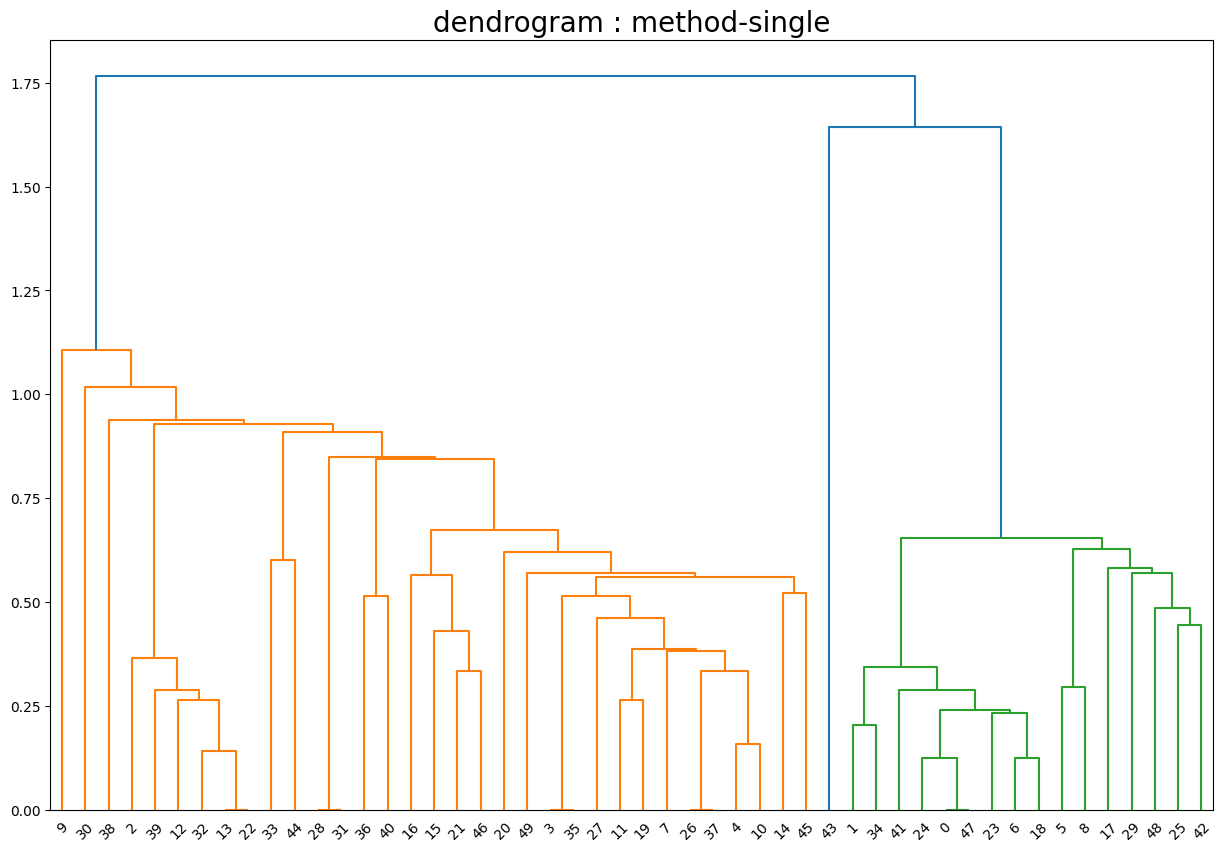

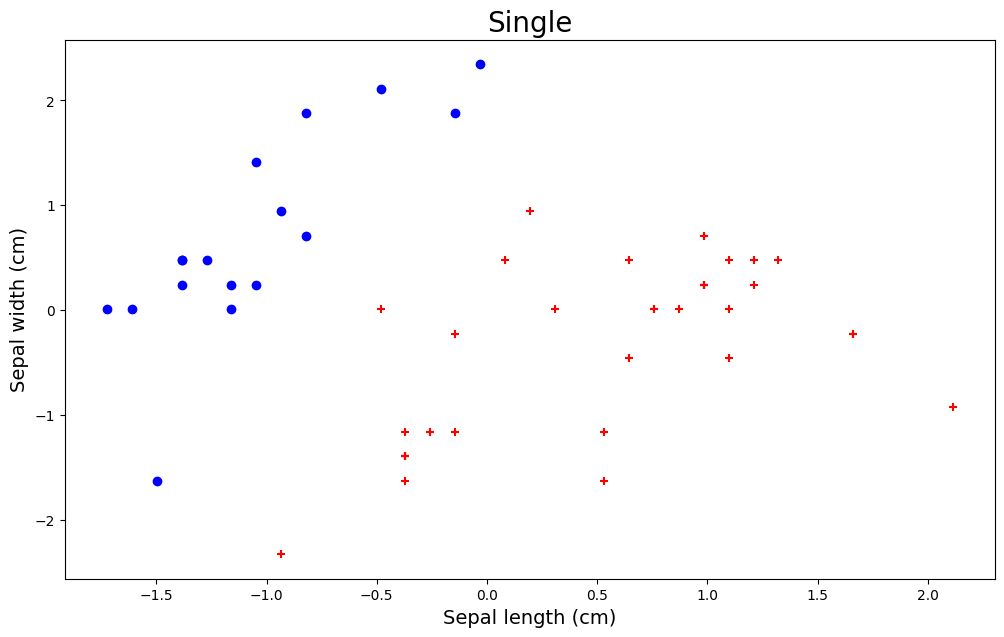

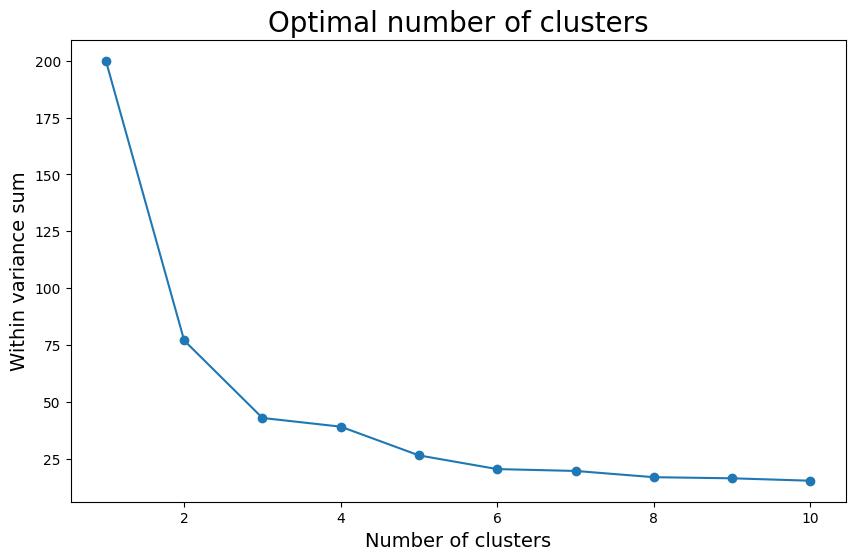

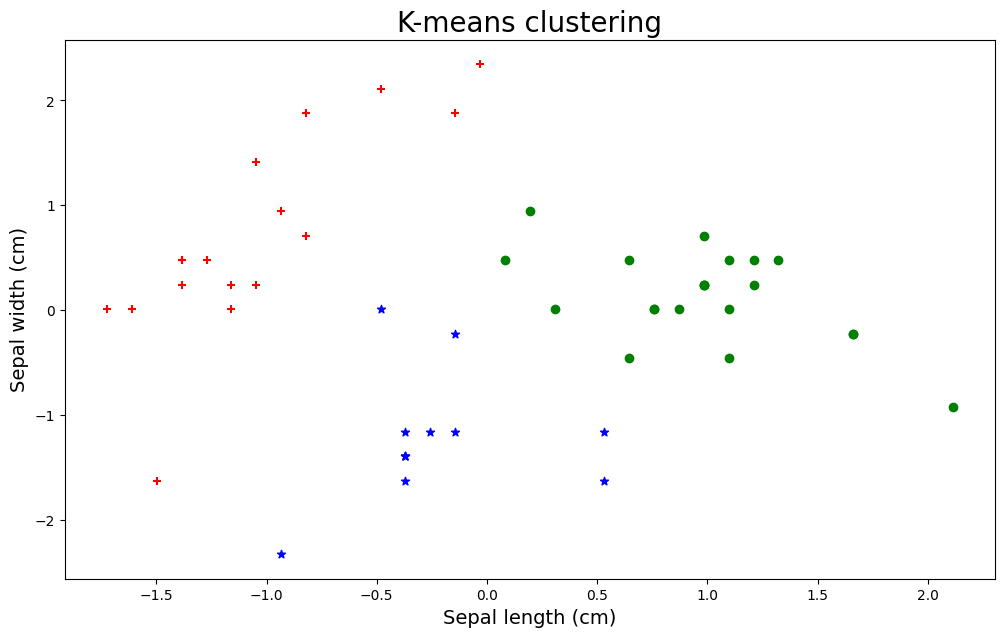

In [8]:
import pandas as pd                                    # Pandas library for data processing
import numpy as np                                     # NumPy library for numerical operations
import os                                              # OS module for operating system related functionalities
import matplotlib.pyplot as plt                        # Matplotlib library for data visualization

from sklearn.preprocessing import StandardScaler       # StandardScaler for data normalization
from sklearn.cluster import KMeans                     # KMeans algorithm for clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, single, complete  # Functions for hierarchical clustering

from sklearn import datasets                           # Module to load sample datasets

# Load Iris dataset
iris = datasets.load_iris()                            # Load the iris dataset

# Convert iris data to DataFrame
Iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(Iris.shape)                                      # Print the shape of Iris DataFrame

# Randomly select 50 samples
np.random.seed(1234)                                   # Set random seed
random_ind = np.random.choice(np.arange(150), 50)      # Randomly select 50 indices from 0-149
Iris = Iris.iloc[random_ind, 0:4]                      # Select 50 rows and first 4 columns
print(Iris.shape)                                      # Print shape after selection
Iris.head()                                            # Display top 5 rows of selected Iris data

# Data scaling and create new DataFrame
Iris_st = StandardScaler().fit_transform(Iris)         # Normalize data using StandardScaler
feature_names = ['sepal_length', 'sepal_width',        # Create list of feature names
                 'petal_length', 'petal_width']
Iris_st = pd.DataFrame(Iris_st, columns=feature_names) # Create new DataFrame with normalized data
Iris_st.head()                                         # Display top 5 rows of normalized data

# Use Euclidean distance
single_dist = linkage(Iris_st, method='single',        # Perform hierarchical clustering using single linkage
                      metric='euclidean')              # Use Euclidean distance metric

# Visualize results using dendrogram
plt.figure(figsize=(15,10))                            # Set figure size (15 inches x 10 inches)
dendrogram(single_dist,                                # Create dendrogram
           leaf_rotation=45,                           # Rotate leaf labels 45 degrees
           leaf_font_size=10,                          # Set leaf label font size to 10
)
plt.title('dendrogram : method-single', fontsize=20)   # Set graph title
plt.show()                                             # Display the graph

# Visualize analysis results when number of clusters is 2
cluster_results = fcluster(single_dist, 2, criterion='maxclust')  # Divide into 2 clusters
cluster_color = np.where(cluster_results == 1, 'red', 'blue')     # Assign colors to clusters
cluster_mark = np.where(cluster_results == 1, '+', 'o')           # Assign marker shapes to clusters

plt.figure(1, figsize=(12, 7))                         # Set figure size (12 inches x 7 inches)
for RowIdx in range(len(Iris_st)):                     # Iterate over each data point
    plt.scatter(Iris_st['sepal_length'].iloc[RowIdx],  # x-axis: sepal length
                Iris_st['sepal_width'].iloc[RowIdx],   # y-axis: sepal width
                c=cluster_color[RowIdx],               # Color based on cluster
                marker=cluster_mark[RowIdx])           # Marker shape based on cluster

plt.title('Single', fontsize=20)                       # Set graph title
plt.xlabel('Sepal length (cm)', fontsize=14)           # Set x-axis label
plt.ylabel('Sepal width (cm)', fontsize=14)            # Set y-axis label
plt.show()                                             # Display the graph

# Find the optimal number of clusters
elbow = []
for nclusters in range(1, 11):
    i_kmeans_model = KMeans(n_clusters = nclusters,
                            init = "random", n_init = 1,
                            random_state = 10).fit(Iris_st)
    # Append inertia (within-cluster sum of squares) to elbow list
    elbow.append(i_kmeans_model.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), elbow, marker='o')
plt.title('Optimal number of clusters', fontsize=20)
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Within variance sum', fontsize=14)
plt.show()

# Analyze data when number of clusters is 3
n_clusters = 3                                         # Set number of clusters to 3
kmeans_model = KMeans(n_clusters=n_clusters, init="random",
                      n_init=1, random_state=10).fit(Iris_st)  # Fit K-means model

cluster_results = kmeans_model.labels_                 # Get cluster labels
cluster_color = np.where(cluster_results == 1, 'red',
              np.where(cluster_results == 2, 'green', 'blue'))  # Assign colors to clusters
cluster_mark = np.where(cluster_results == 1, '+',
              np.where(cluster_results == 2, 'o', '*'))  # Assign marker shapes to clusters

plt.figure(1, figsize=(12, 7))                         # Set figure size
for RowIdx in range(len(Iris_st)):                     # Iterate over each data point
    plt.scatter(Iris_st['sepal_length'].iloc[RowIdx],  # x-axis: sepal length
                Iris_st['sepal_width'].iloc[RowIdx],   # y-axis: sepal width
                c=cluster_color[RowIdx],               # Color based on cluster
                marker=cluster_mark[RowIdx])           # Marker shape based on cluster

plt.title('K-means clustering', fontsize=20)           # Set graph title
plt.xlabel('Sepal length (cm)', fontsize=14)           # Set x-axis label
plt.ylabel('Sepal width (cm)', fontsize=14)            # Set y-axis label
plt.show()                                             # Display the graph